# Auto-Detection of Suspicious Profile in Social Media Platforms

For the current and upcoming generations, everyone's extrovert life has converted to getting connected with online social networks. These kinds of sites are fundamentally changing the methods we follow in our social daily lives. Making new connections and sharing their daily lives has become easier. Although there is an increase in the growth of social profiles, various difficulties, including online impersonation and false profiles, are another major concern. No such suitable solution was introduced before to check for the same difficulties. To solve these difficulties, we have proposed a configured architecture in which auto detection of suspicious activity is not only possible but efficient too. The techniques that are used to classify, such as support vector machines, decision trees, and Naive Bayes, etc., are used in this framework to mark profiles as false or true. We can use this approach easily on various online social networks that consist of millions of profiles that cannot be explored manually.

# Downloading the Dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/joewilson02/social-media-fake-account'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./social-media-fake-account" (use force=True to force download)


In [4]:
data_dir='./social-media-fake-account'

In [5]:
# checking whether the dataset present in directory or not
import os
dataset_list=os.listdir(data_dir)
print(dataset_list)

['fusers.csv', 'users.csv']


# Importing Libraries

In [6]:
!pip install pandas-profiling --quiet

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import ydata_profiling as pp
from ydata_profiling import ProfileReport
# import sexmachine.detector as gender
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [8]:
#reading the dataset
fake_user=pd.read_csv(data_dir+"/"+dataset_list[0])
normal_user=pd.read_csv(data_dir+"/"+dataset_list[1])

In [9]:
fake_user

id                name      screen_name  statuses_count  \
0      370098498        pirfectmoses     pirfectmoses              24   
1       37384589            SAK Nair      bsknair1967             656   
2       72110028              Deepak          dedjven            1234   
3       82885728     Marcos Vinicius        BrowAlves             573   
4      110120789  Shri Kant Kanaujia       kanaujiask             675   
...          ...                 ...              ...             ...   
1332  1391497074         Verda Marks      VerdaMarks1               1   
1333  1391544607     Danial Campbell  DanialCampbell2               0   
1334  1391622127        Maudie Meyer     MaudieMeyer1               2   
1335  1391832212     Harriett Harvey  HarriettHarvey9               2   
1336  1391998039     Gillian Wheeler  GillianWheeler3               0   

      followers_count  friends_count  favourites_count  listed_count  \
0                   4            588                16             0   
1                  57            693               597             0   
2                  15            104              1150             0   
3                  14            227               530             0   
4                  18            519               653             0   
...               ...            ...               ...           ...   
1332                0             17                 0             0   
1333                1             17                 0             0   
1334                0             15                 0             0   
1335                0             16                 0             0   
1336                0             17                 0             0   

                          created_at  url  ... profile_sidebar_fill_color  \
0     Thu Sep 08 13:20:35 +0000 2011  NaN  ...                     DDEEF6   
1     Sun May 03 07:35:13 +0000 2009  NaN  ...                     DDEEF6   
2     Sun Sep 06 19:50:08 +0000 2009  NaN  ...                     EFEFEF   
3     Fri Oct 16 14:02:48 +0000 2009  NaN  ...                     DDEEF6   
4     Sun Jan 31 12:08:41 +0000 2010  NaN  ...                     DDEEF6   
...                              ...  ...  ...                        ...   
1332  Tue Apr 30 08:23:57 +0000 2013  NaN  ...                     DDEEF6   
1333  Tue Apr 30 08:34:49 +0000 2013  NaN  ...                     DDEEF6   
1334  Tue Apr 30 09:21:12 +0000 2013  NaN  ...                     DDEEF6   
1335  Tue Apr 30 11:25:11 +0000 2013  NaN  ...                     DDEEF6   
1336  Tue Apr 30 12:47:51 +0000 2013  NaN  ...                     DDEEF6   

                           profile_background_image_url  \
0     http://a0.twimg.com/profile_background_images/...   
1       http://a0.twimg.com/images/themes/theme1/bg.png   
2      http://a0.twimg.com/images/themes/theme14/bg.gif   
3     http://a0.twimg.com/profile_background_images/...   
4       http://a0.twimg.com/images/themes/theme1/bg.png   
...                                                 ...   
1332    http://a0.twimg.com/images/themes/theme1/bg.png   
1333    http://a0.twimg.com/images/themes/theme1/bg.png   
1334    http://a0.twimg.com/images/themes/theme1/bg.png   
1335    http://a0.twimg.com/images/themes/theme1/bg.png   
1336    http://a0.twimg.com/images/themes/theme1/bg.png   

     profile_background_color  profile_link_color  utc_offset  protected  \
0                      C6E2EE              1F98C7         NaN        NaN   
1                      C0DEED              0084B4         NaN        NaN   
2                      131516              009999    -39600.0        NaN   
3                      C0DEED              0084B4         NaN        NaN   
4                      C0DEED              0084B4     19800.0        NaN   
...                       ...                 ...         ...        ...   
1332                   C0DEED              0084B4         NaN        NaN   
1333                   C0DEED 

In [10]:
normal_user

id              name     screen_name  statuses_count  \
0        3610511  Davide Dellacasa          braddd           20370   
1        5656162    Simone Economo           eKoeS            3131   
2        5682702            tacone         tacone_            4024   
3        6067292          alesaura        alesstar           40586   
4        6015122            Angelo      PerDiletto            2016   
...          ...               ...             ...             ...   
1476  1127280169  Frilaif Official         frilaif              49   
1477  1156344000   ♔♥HeartsQueen♥♔    Stronzetta__              66   
1478  1169114810     angelagervasi  angelagervasi2               4   
1479  1212975186          Midnight         Movie1O               3   
1480  1213937306               ʸᵒᵘ  xjawaadscookie            2568   

      followers_count  friends_count  favourites_count  listed_count  \
0                5470           2385               145            52   
1                 506            381                 9            40   
2                 264             87               323            16   
3                 640            622              1118            32   
4                  62             64                13             0   
...               ...            ...               ...           ...   
1476              208            124                14             2   
1477               22             55                 0             0   
1478                0              4                 3             0   
1479                2              4                 0             0   
1480              351            341               318             2   

                          created_at                                url  ...  \
0     Fri Apr 06 10:58:22 +0000 2007           http://braddd.tumblr.com  ...   
1     Mon Apr 30 15:08:42 +0000 2007         http://www.lineheight.net/  ...   
2     Tue May 01 11:53:40 +0000 2007               http://t.co/LKrl1dZE  ...   
3     Tue May 15 16:55:16 +0000 2007     http://alesstar.wordpress.com/  ...   
4     Sun May 13 19:52:00 +0000 2007  http://www.flickr.com/per_diletto  ...   
...                              ...                                ...  ...   
1476  Mon Jan 28 07:13:47 +0000 2013             http://t.co/IkqfPF32pr  ...   
1477  Thu Feb 07 07:27:08 +0000 2013                                NaN  ...   
1478  Mon Feb 11 14:50:19 +0000 2013                                NaN  ...   
1479  Sat Feb 23 17:46:55 +0000 2013                                NaN  ...   
1480  Sat Feb 23 23:17:08 +0000 2013                                NaN  ...   

     profile_sidebar_fill_color  \
0                        FFF7CC   
1                        DDEEF6   
2                        000000   
3                        95E8EC   
4                        F6F6F6   
...                         ...   
1476                     DDEEF6   
1477                     7AC3EE   
1478                     DDEEF6   
1479                     F6FFD1   
1480                     DDEEF6   

                           profile_background_image_url  \
0     http://a0.twimg.com/profile_background_images/...   
1       http://a0.twimg.com/images/themes/theme1/bg.png   
2     http://a0.twimg.com/profile_background_images/...   
3       http://a0.twimg.com/images/themes/theme4/bg.gif   
4      http://a0.twimg.com/images/themes/theme18/bg.gif   
...                                                 ...   
1476    http://a0.twimg.com/images/themes/theme1/bg.png   
1477   http://a0.twimg.com/images/themes/theme10/bg.gif   
1478    http://a0.twimg.com/images/themes/theme1/bg.png   
1479  http://a0.twimg.com/profile_background_images/...   
1480  http://a0.twimg.com/profile_background_images/...   

     profile_background_color  profile_link_color  utc_offset  protected  \
0                      BADFCD              FF0000      3600.0        NaN   
1                      C0DEED              0084B4      3600.0    

In [11]:
# Row count for both dataset
row_count=[]
for i in range(len(dataset_list)):
    i=pd.read_csv(data_dir+"/"+dataset_list[i])
    rows=len(i.axes[0])
    row_count.append(rows)
#     print(rows)
print(row_count)

[1337, 1481]


In [12]:
dataset_list,row_count


(['fusers.csv', 'users.csv'], [1337, 1481])

In [13]:
#for fake_users value is 1
#for normal_user value is 0

#for df_fusers
isFake = np.ones(row_count[0])
print(len(isFake))


#for df_users
isNotFake = np.zeros(row_count[1])
print(len(isNotFake))


1337
1481


In [14]:
#adding isfake column to make predictions for it

fake_user["isFake"] = isFake
normal_user["isFake"] = isNotFake



In [15]:
# Combine both datasets
all_data=pd.concat([normal_user,fake_user])
all_data

id              name      screen_name  statuses_count  \
0        3610511  Davide Dellacasa           braddd           20370   
1        5656162    Simone Economo            eKoeS            3131   
2        5682702            tacone          tacone_            4024   
3        6067292          alesaura         alesstar           40586   
4        6015122            Angelo       PerDiletto            2016   
...          ...               ...              ...             ...   
1332  1391497074       Verda Marks      VerdaMarks1               1   
1333  1391544607   Danial Campbell  DanialCampbell2               0   
1334  1391622127      Maudie Meyer     MaudieMeyer1               2   
1335  1391832212   Harriett Harvey  HarriettHarvey9               2   
1336  1391998039   Gillian Wheeler  GillianWheeler3               0   

      followers_count  friends_count  favourites_count  listed_count  \
0                5470           2385               145            52   
1                 506            381                 9            40   
2                 264             87               323            16   
3                 640            622              1118            32   
4                  62             64                13             0   
...               ...            ...               ...           ...   
1332                0             17                 0             0   
1333                1             17                 0             0   
1334                0             15                 0             0   
1335                0             16                 0             0   
1336                0             17                 0             0   

                          created_at                                url  ...  \
0     Fri Apr 06 10:58:22 +0000 2007           http://braddd.tumblr.com  ...   
1     Mon Apr 30 15:08:42 +0000 2007         http://www.lineheight.net/  ...   
2     Tue May 01 11:53:40 +0000 2007               http://t.co/LKrl1dZE  ...   
3     Tue May 15 16:55:16 +0000 2007     http://alesstar.wordpress.com/  ...   
4     Sun May 13 19:52:00 +0000 2007  http://www.flickr.com/per_diletto  ...   
...                              ...                                ...  ...   
1332  Tue Apr 30 08:23:57 +0000 2013                                NaN  ...   
1333  Tue Apr 30 08:34:49 +0000 2013                                NaN  ...   
1334  Tue Apr 30 09:21:12 +0000 2013                                NaN  ...   
1335  Tue Apr 30 11:25:11 +0000 2013                                NaN  ...   
1336  Tue Apr 30 12:47:51 +0000 2013                                NaN  ...   

                           profile_background_image_url  \
0     http://a0.twimg.com/profile_background_images/...   
1       http://a0.twimg.com/images/themes/theme1/bg.png   
2     http://a0.twimg.com/profile_background_images/...   
3       http://a0.twimg.com/images/themes/theme4/bg.gif   
4      http://a0.twimg.com/images/themes/theme18/bg.gif   
...                                                 ...   
1332    http://a0.twimg.com/images/themes/theme1/bg.png   
1333    http://a0.twimg.com/images/themes/theme1/bg.png   
1334    http://a0.twimg.com/images/themes/theme1/bg.png   
1335    http://a0.twimg.com/images/themes/theme1/bg.png   
1336    http://a0.twimg.com/images/themes/theme1/bg.png   

     profile_background_color profile_link_color  utc_offset  protected  \
0                      BADFCD             FF0000      3600.0        NaN   
1                      C0DEED             0084B4      3600.0        NaN   
2                      1A1B1F             2FC2EF      3600.0        NaN   
3                      0099B9             0099B9      3600.0        NaN   
4                      ACDED6             038543      3600.0        NaN   
...                       ...                ...         ...        ...   
1332                   C0DEED             0084B4         NaN        NaN   
1333                   C0D

In [16]:
#to shuffle the whole data
all_data = all_data.sample(frac=1).reset_index(drop=True)
all_data

id               name      screen_name  statuses_count  \
0     617742720       Arden Mclean  ardenmcleankdzl              47   
1     616263295      Willie Harper       williezyee              44   
2     491690867                Gi.       MiChiamoGi            4061   
3     792517914     Vetra S. ✘ ✘ ✘    Supremacyyyyy            4904   
4     560271082              mich.       MichelaYep             433   
...         ...                ...              ...             ...   
2813  617060374      Jeanelle Ware   jeanellewarerk              30   
2814  616306866           Nan Clay     nanclaytljpe              50   
2815  246208736  Michele Fubo Buso           M_Fubo            4235   
2816  955497098   miriam lafiandra  miriamlafiandra             343   
2817  612645350      thuglife_navy     DebbyNewLand             439   

      followers_count  friends_count  favourites_count  listed_count  \
0                  16            328                 0             0   
1                  31            628                 0             0   
2                 193            936              1634             0   
3                 734            808                29             0   
4                  52            233                36             0   
...               ...            ...               ...           ...   
2813               19            304                 0             0   
2814               25            489                 0             0   
2815              111            163                47             2   
2816               11             24                 4             0   
2817               49             91                64             0   

                          created_at                             url  ...  \
0     Mon Jun 25 01:47:11 +0000 2012                             NaN  ...   
1     Sat Jun 23 16:34:41 +0000 2012                             NaN  ...   
2     Mon Feb 13 22:31:49 +0000 2012                             NaN  ...   
3     Thu Aug 30 22:18:56 +0000 2012                             NaN  ...   
4     Sun Apr 22 12:45:03 +0000 2012                             NaN  ...   
...                              ...                             ...  ...   
2813  Sun Jun 24 12:01:39 +0000 2012                             NaN  ...   
2814  Sat Jun 23 15:54:58 +0000 2012                             NaN  ...   
2815  Wed Feb 02 10:54:47 +0000 2011  http://www.facebook.com/Fubo87  ...   
2816  Sun Nov 18 13:31:08 +0000 2012                             NaN  ...   
2817  Tue Jun 19 15:46:00 +0000 2012                             NaN  ...   

                           profile_background_image_url  \
0       http://a0.twimg.com/images/themes/theme1/bg.png   
1       http://a0.twimg.com/images/themes/theme1/bg.png   
2      http://a0.twimg.com/images/themes/theme10/bg.gif   
3     http://a0.twimg.com/profile_background_images/...   
4       http://a0.twimg.com/images/themes/theme4/bg.gif   
...                                                 ...   
2813    http://a0.twimg.com/images/themes/theme1/bg.png   
2814    http://a0.twimg.com/images/themes/theme1/bg.png   
2815  http://a0.twimg.com/profile_background_images/...   
2816   http://a0.twimg.com/images/themes/theme10/bg.gif   
2817  http://a0.twimg.com/profile_background_images/...   

     profile_background_color profile_link_color  utc_offset  protected  \
0                      C0DEED             0084B4         NaN        NaN   
1                      C0DEED             0084B4         NaN        NaN   
2                      642D8B             FF0000      3600.0        NaN   
3                      131516             009999      3600.0        NaN   
4                      002EB8             3100B8      7200.0        NaN   
...                       ...                ...         ...        ...   
2813                   C0DEED             0084B4         NaN        NaN   
2814                   C0DEED             0084B4         NaN 

In [17]:
all_data.describe()

id  statuses_count  followers_count  friends_count  \
count  2.818000e+03     2818.000000      2818.000000    2818.000000   
mean   5.374889e+08     1672.198368       371.105039     395.363023   
std    2.977005e+08     4884.669157      8022.631339     465.694322   
min    3.610511e+06        0.000000         0.000000       0.000000   
25%    3.620867e+08       35.000000        17.000000     168.000000   
50%    6.162253e+08       77.000000        26.000000     306.000000   
75%    6.177673e+08     1087.750000       111.000000     519.000000   
max    1.391998e+09    79876.000000    408372.000000   12773.000000   

       favourites_count  listed_count  default_profile  default_profile_image  \
count       2818.000000   2818.000000           1728.0                    8.0   
mean         234.541164      2.818666              1.0                    1.0   
std         1445.847248     23.480430              0.0                    0.0   
min            0.000000      0.000000              1.0                    1.0   
25%            0.000000      0.000000              1.0                    1.0   
50%            0.000000      0.000000              1.0                    1.0   
75%           37.000000      1.000000              1.0                    1.0   
max        44349.000000    744.000000              1.0                    1.0   

       geo_enabled  profile_use_background_image  profile_background_tile  \
count        721.0                        2760.0                    489.0   
mean           1.0                           1.0                      1.0   
std            0.0                           0.0                      0.0   
min            1.0                           1.0                      1.0   
25%            1.0                           1.0                      1.0   
50%            1.0                           1.0                      1.0   
75%            1.0                           1.0                      1.0   
max            1.0                           1.0                      1.0   

         utc_offset  protected  verified       isFake  
count   1069.000000        0.0       0.0  2818.000000  
mean    1478.391020        NaN       NaN     0.474450  
std     8108.211889        NaN       NaN     0.499435  
min   -39600.000000        NaN       NaN     0.000000  
25%     3600.000000        NaN       NaN     0.000000  
50%     3600.000000        NaN       NaN     0.000000  
75%     3600.000000        NaN       NaN     1.000000  
max    36000.000000        NaN       NaN     1.000000

In [18]:
all_data.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'isFake'],
      dtype='object')

In [19]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  2818 non-null   int64  
 1   name                                2818 non-null   object 
 2   screen_name                         2818 non-null   object 
 3   statuses_count                      2818 non-null   int64  
 4   followers_count                     2818 non-null   int64  
 5   friends_count                       2818 non-null   int64  
 6   favourites_count                    2818 non-null   int64  
 7   listed_count                        2818 non-null   int64  
 8   created_at                          2818 non-null   object 
 9   url                                 463 non-null    object 
 10  lang                                2818 non-null   object 
 11  time_zone                           1069 no

In [20]:
all_data.isnull().sum()

id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   2355
lang                                     0
time_zone                             1749
location                               547
default_profile                       1090
default_profile_image                 2810
geo_enabled                           2097
profile_image_url                        0
profile_banner_url                    1831
profile_use_background_image            58
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

In [21]:
all_data['isFake'].value_counts()

0.0    1481
1.0    1337
Name: isFake, dtype: int64

In [22]:
all_data.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'isFake'],
      dtype='object')

In [23]:
all_data.drop(columns=['id', 'name', 'screen_name', 'created_at',
       'url', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'profile_image_url',
       'profile_banner_url',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],inplace=True)

In [24]:
all_data.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'lang', 'geo_enabled',
       'profile_use_background_image', 'isFake'],
      dtype='object')

In [25]:
all_data.isnull().sum()

statuses_count                     0
followers_count                    0
friends_count                      0
favourites_count                   0
listed_count                       0
lang                               0
geo_enabled                     2097
profile_use_background_image      58
isFake                             0
dtype: int64

In [26]:
all_data['geo_enabled'] = all_data['geo_enabled'].fillna(False)
all_data['geo_enabled'] = all_data['geo_enabled'].astype(bool)
all_data['profile_use_background_image'] = all_data['profile_use_background_image'].astype(bool)


In [27]:
all_data.isnull().sum()

statuses_count                  0
followers_count                 0
friends_count                   0
favourites_count                0
listed_count                    0
lang                            0
geo_enabled                     0
profile_use_background_image    0
isFake                          0
dtype: int64

## Distribution of Data in X and Y

In [28]:
Y = all_data.isFake

In [29]:
all_data.drop(["isFake"], axis=1, inplace=True)
X = all_data

In [30]:
print(X)

      statuses_count  followers_count  friends_count  favourites_count  \
0                 47               16            328                 0   
1                 44               31            628                 0   
2               4061              193            936              1634   
3               4904              734            808                29   
4                433               52            233                36   
...              ...              ...            ...               ...   
2813              30               19            304                 0   
2814              50               25            489                 0   
2815            4235              111            163                47   
2816             343               11             24                 4   
2817             439               49             91                64   

      listed_count lang  geo_enabled  profile_use_background_image  
0                0   en        False      

In [31]:
print(Y)

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
2813    1.0
2814    1.0
2815    0.0
2816    0.0
2817    0.0
Name: isFake, Length: 2818, dtype: float64


In [32]:
print(Y.shape)

(2818,)


In [33]:
X.head()

statuses_count  followers_count  friends_count  favourites_count  \
0              47               16            328                 0   
1              44               31            628                 0   
2            4061              193            936              1634   
3            4904              734            808                29   
4             433               52            233                36   

   listed_count lang  geo_enabled  profile_use_background_image  
0             0   en        False                          True  
1             0   en        False                          True  
2             0   it        False                          True  
3             0   it         True                          True  
4             0   it        False                          True

In [34]:
lang_list = list(enumerate(np.unique(X["lang"])))
lang_dict = {name : i for i, name in lang_list}
X.loc[:, "lang_num"] = X["lang"].map(lambda x: lang_dict[x]).astype(int)

X.drop(["lang"], axis=1, inplace=True)

In [35]:
X.head()

statuses_count  followers_count  friends_count  favourites_count  \
0              47               16            328                 0   
1              44               31            628                 0   
2            4061              193            936              1634   
3            4904              734            808                29   
4             433               52            233                36   

   listed_count  geo_enabled  profile_use_background_image  lang_num  
0             0        False                          True         1  
1             0        False                          True         1  
2             0        False                          True         5  
3             0         True                          True         5  
4             0        False                          True         5

In [36]:
X.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'geo_enabled',
       'profile_use_background_image', 'lang_num'],
      dtype='object')

In [37]:
Y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: isFake, dtype: float64

In [38]:
profile = ProfileReport(X, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
X = X.replace(np.nan, 0) #To replace the missing boolean values with zeros as it means false

In [40]:
profile = ProfileReport(X, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [42]:
print(X.shape,train_X.shape,test_X.shape)

(2818, 8) (2254, 8) (564, 8)


## Support Vector(Design of Model)

In [43]:
print(train_X)

      statuses_count  followers_count  friends_count  favourites_count  \
402              576               78            209                 0   
2129              45               27            702                 0   
1211              53               22            622                 0   
452                2                0             28                 0   
1774              18               18            276                 0   
...              ...              ...            ...               ...   
763               37               16            227                 0   
835               53                8             91                37   
1653             108              104             81                31   
2607              75               28            687                 0   
2732              37               21            294                 0   

      listed_count  geo_enabled  profile_use_background_image  lang_num  
402              2         True      

In [44]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
classifier = svm.SVC()
#training the support vector Machine Classifier
classifier.fit(train_X, train_y)

SVC()

In [45]:
# Make predictions on the training data
y_pred_svc_train = classifier.predict(train_X)

# Support vector machine scores based on training data
svc_accuracy_train = accuracy_score(train_y, y_pred_svc_train)
svc_precision_train = precision_score(train_y, y_pred_svc_train,average='weighted')
svc_recall_train = recall_score(train_y, y_pred_svc_train,average='weighted')
print("Training accuracy: ", svc_accuracy_train)
print("Training precision: ", svc_precision_train)
print("Training recall: ", svc_recall_train)

Training accuracy:  0.8469387755102041
Training precision:  0.8812156331125304
Training recall:  0.8469387755102041


In [46]:
# Make predictions on the testing data
y_pred_svc_test = classifier.predict(test_X)
# Support vector machine scores based on testing data
svc_accuracy_test = accuracy_score(test_y, y_pred_svc_test)
svc_precision_test = precision_score(test_y, y_pred_svc_test,average='weighted')
svc_recall_test = recall_score(test_y, y_pred_svc_test,average='weighted')
print("Testing accuracy: ", svc_accuracy_test)
print("Testing precision: ", svc_precision_test)
print("Testing recall: ", svc_recall_test)

Testing accuracy:  0.8546099290780141
Testing precision:  0.8852195300079805
Testing recall:  0.8546099290780141


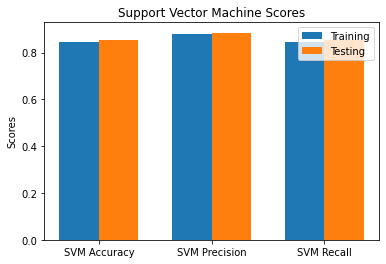

In [47]:
import matplotlib.pyplot as plt
# Plot the comparison between training and testing data for Support Vector Machine
scores_train_svc = [svc_accuracy_train, svc_precision_train, svc_recall_train]
scores_test_svc = [svc_accuracy_test, svc_precision_test, svc_recall_test]
labels_svc = ['SVM Accuracy', 'SVM Precision', 'SVM Recall']

x = range(len(labels_svc))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], scores_train_svc, width, label='Training')
rects2 = ax.bar([i + width/2 for i in x], scores_test_svc, width, label='Testing')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels_svc)
ax.legend()

plt.title('Support Vector Machine Scores')
plt.show()

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
print(X.shape,Y.shape,train_X.shape,test_X.shape,train_y.shape,test_y.shape)

(2818, 8) (2818,) (2254, 8) (564, 8) (2254,) (564,)


In [49]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the random forest classifier on the training data
rfc.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

In [50]:
# Make predictions on the training data
y_pred_rf_train = rfc.predict(train_X)


# Random Forest Classifier scores based on training data
rf_accuracy_train = accuracy_score(train_y, y_pred_rf_train)
rf_precision_train = precision_score(train_y, y_pred_rf_train,average='weighted')
rf_recall_train = recall_score(train_y, y_pred_rf_train,average='weighted')
print("Training accuracy: ", rf_accuracy_train)
print("Training precision: ", rf_precision_train)
print("Training recall: ", rf_recall_train)

Training accuracy:  1.0
Training precision:  1.0
Training recall:  1.0


In [51]:
# Make predictions on the testing data
y_pred_rf_test = rfc.predict(test_X)

# Random Forest Classifier scores based on training data
rf_accuracy_test = accuracy_score(test_y, y_pred_rf_test)
rf_precision_test = precision_score(test_y, y_pred_rf_test,average='weighted')
rf_recall_test = recall_score(test_y, y_pred_rf_test,average='weighted')
print("Testing accuracy: ", rf_accuracy_test)
print("Testing precision: ", rf_precision_test)
print("Testing recall: ", rf_recall_test)

Testing accuracy:  1.0
Testing precision:  1.0
Testing recall:  1.0


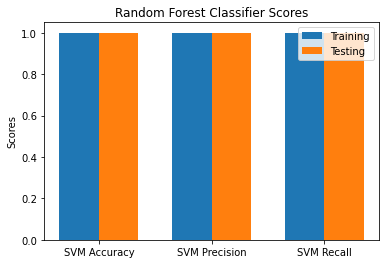

In [52]:
import matplotlib.pyplot as plt
# Plot the comparison between training and testing data for Support Vector Machine
scores_train_rf = [rf_accuracy_train, rf_precision_train, rf_recall_train]
scores_test_rf = [rf_accuracy_test, rf_precision_test, rf_recall_test]
labels_rf = ['RF Accuracy', 'RF Precision', 'RF Recall']

x = range(len(labels_rf))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], scores_train_rf, width, label='Training')
rects2 = ax.bar([i + width/2 for i in x], scores_test_rf, width, label='Testing')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels_svc)
ax.legend()

plt.title('Random Forest Classifier Scores')
plt.show()

## Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_X, train_y)

GaussianNB()

In [54]:
# Predict on training and testing data for Naive Bayes
y_pred_train_gnb = gnb.predict(train_X)


# Calculate accuracy, precision, and recall scores for Naive Bayes using training data
gnb_accuracy_train = accuracy_score(train_y, y_pred_train_gnb)
gnb_precision_train = precision_score(train_y, y_pred_train_gnb)
gnb_recall_train = recall_score(train_y, y_pred_train_gnb)

print("Training accuracy: ", gnb_accuracy_train)
print("Training precision: ", gnb_precision_train)
print("Training recall: ", gnb_recall_train)

Training accuracy:  0.9840283939662822
Training precision:  0.9742647058823529
Training recall:  0.9925093632958801


In [55]:
# Predict on testing data for Naive Bayes
y_pred_test_gnb = gnb.predict(test_X)

# Calculate accuracy, precision, and recall scores for Naive Bayes using testing data

gnb_accuracy_test = accuracy_score(test_y, y_pred_test_gnb)
gnb_precision_test = precision_score(test_y, y_pred_test_gnb)
gnb_recall_test = recall_score(test_y, y_pred_test_gnb)

print("Training accuracy: ", gnb_accuracy_test)
print("Training precision: ", gnb_precision_test)
print("Training recall: ", gnb_recall_test)

Training accuracy:  0.9840425531914894
Training precision:  0.9744525547445255
Training recall:  0.9925650557620818


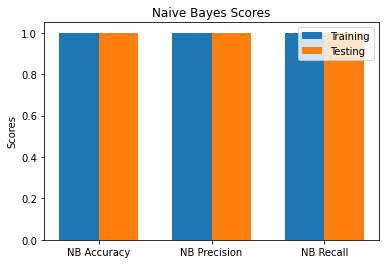

In [56]:
# Plot the comparison between training and testing data for Naive Bayes
scores_train_gnb = [gnb_accuracy_train, gnb_precision_train, gnb_recall_train]
scores_test_gnb = [gnb_accuracy_test, gnb_precision_test, gnb_recall_test]
labels_gnb = ['NB Accuracy', 'NB Precision', 'NB Recall']

x = range(len(labels_gnb))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], scores_train_rf, width, label='Training')
rects2 = ax.bar([i + width/2 for i in x], scores_test_rf, width, label='Testing')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels_gnb)
ax.legend()

plt.title('Naive Bayes Scores')
plt.show()

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(train_X, train_y)

LogisticRegression(max_iter=1000)

In [58]:
# Predict on training data for Logistic Regression
y_pred_train_lr = lr.predict(train_X)

# Calculate accuracy, precision, and recall scores for Logistic Regression using training data
lr_accuracy_train = accuracy_score(train_y, y_pred_train_lr)
lr_precision_train = precision_score(train_y, y_pred_train_lr)
lr_recall_train = recall_score(train_y, y_pred_train_lr)
print("Training accuracy: ", lr_accuracy_train)
print("Training precision: ", lr_precision_train)
print("Training recall: ", lr_recall_train)


Training accuracy:  0.997338065661047
Training precision:  0.9953358208955224
Training recall:  0.9990636704119851


In [59]:
# Predict on testing data for Logistic Regression
y_pred_test_lr = lr.predict(test_X)

# Calculate accuracy, precision, and recall scores for Logistic Regression using testing data
lr_accuracy_test = accuracy_score(test_y, y_pred_test_lr)
lr_precision_test = precision_score(test_y, y_pred_test_lr)
lr_recall_test = recall_score(test_y, y_pred_test_lr)

print("Training accuracy: ", lr_accuracy_test)
print("Training precision: ", lr_precision_test)
print("Training recall: ", lr_recall_test)


Training accuracy:  0.9964539007092199
Training precision:  0.992619926199262
Training recall:  1.0


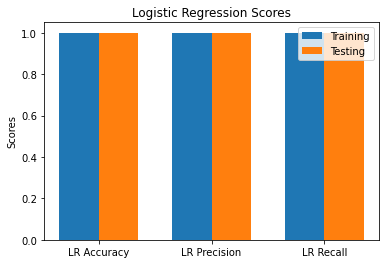

In [60]:
# Plot the comparison between training and testing data for Logistic Regression
scores_train_lr = [lr_accuracy_train, lr_precision_train, lr_recall_train]
scores_test_lr = [lr_accuracy_test, lr_precision_test, lr_recall_test]
labels_lr = ['LR Accuracy', 'LR Precision', 'LR Recall']

x = range(len(labels_lr))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], scores_train_rf, width, label='Training')
rects2 = ax.bar([i + width/2 for i in x], scores_test_rf, width, label='Testing')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels_lr)
ax.legend()

plt.title('Logistic Regression Scores')
plt.show()

## Comparison of all algorithms

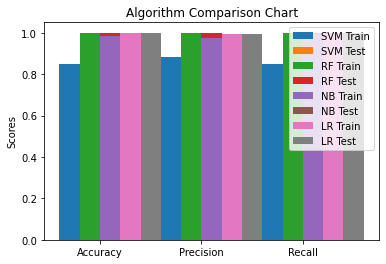

In [61]:
# Create data for comparison chart
labels = ['Accuracy', 'Precision', 'Recall']
svm_train = [svc_accuracy_train, svc_precision_train, svc_recall_train]
svm_test = [svc_accuracy_test, svc_precision_test, svc_recall_test]
rf_train = [rf_accuracy_train, rf_precision_train, rf_recall_train]
rf_test = [rf_accuracy_test, rf_precision_test, rf_recall_test]
nb_train = [gnb_accuracy_train, gnb_precision_train, gnb_recall_train]
nb_test = [gnb_accuracy_test, gnb_precision_test, gnb_recall_test]
lr_train = [lr_accuracy_train, lr_precision_train, lr_recall_train]
lr_test = [lr_accuracy_test, lr_precision_test, lr_recall_test]

x = np.arange(len(labels))
width = 0.2

# Plot the comparison chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, svm_train, width, label='SVM Train')
rects2 = ax.bar(x - width/2, svm_test, width, label='SVM Test')
rects3 = ax.bar(x - width/2, rf_train, width, label='RF Train')
rects4 = ax.bar(x + width/2, rf_test, width, label='RF Test')
rects5 = ax.bar(x + width/2, nb_train, width, label='NB Train')
rects6 = ax.bar(x + 3*width/2, nb_test, width, label='NB Test')
rects7 = ax.bar(x + 3*width/2, lr_train, width, label='LR Train')
rects8 = ax.bar(x + 5*width/2, lr_test, width, label='LR Test')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title('Algorithm Comparison Chart')
plt.show()

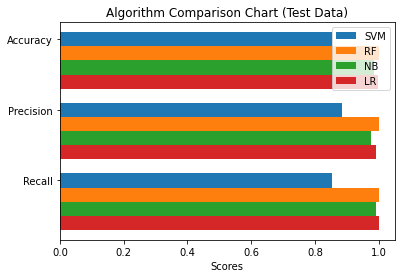

In [62]:
# Create data for horizontal barplot (Testing Data)
data = {'SVM': [svc_accuracy_test, svc_precision_test, svc_recall_test],
        'RF': [rf_accuracy_test, rf_precision_test, rf_recall_test],
        'NB': [gnb_accuracy_test, gnb_precision_test, gnb_recall_test],
        'LR': [lr_accuracy_test, lr_precision_test, lr_recall_test]}
labels = ['Accuracy', 'Precision', 'Recall']

# Create horizontal barplot
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
width = 0.2

for i, (alg, scores) in enumerate(data.items()):
    ax.barh(y_pos + (i * width), scores, width, label=alg)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Scores')
ax.legend()

plt.title('Algorithm Comparison Chart (Test Data)')
plt.show()


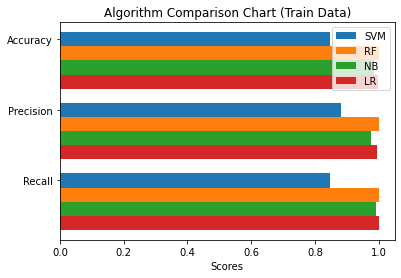

In [63]:
# Create data for horizontal barplot (Training data)
data = {'SVM': [svc_accuracy_train, svc_precision_train, svc_recall_train],
        'RF': [rf_accuracy_train, rf_precision_train, rf_recall_train],
        'NB': [gnb_accuracy_train, gnb_precision_train, gnb_recall_train],
        'LR': [lr_accuracy_train, lr_precision_train, lr_recall_train]}
labels = ['Accuracy', 'Precision', 'Recall']

# Create horizontal barplot
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
width = 0.2

for i, (alg, scores) in enumerate(data.items()):
    ax.barh(y_pos + (i * width), scores, width, label=alg)

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Scores')
ax.legend()

plt.title('Algorithm Comparison Chart (Train Data)')
plt.show()


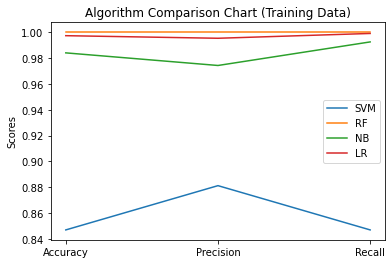

In [64]:
# Create data for line plot
data = {'SVM': [svc_accuracy_train, svc_precision_train, svc_recall_train],
        'RF': [rf_accuracy_train, rf_precision_train, rf_recall_train],
        'NB': [gnb_accuracy_train, gnb_precision_train, gnb_recall_train],
        'LR': [lr_accuracy_train, lr_precision_train, lr_recall_train]}
labels = ['Accuracy', 'Precision', 'Recall']

# Create line plot
fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

for alg, scores in data.items():
    ax.plot(x_pos, scores, label=alg)

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_ylabel('Scores')
ax.legend()

plt.title('Algorithm Comparison Chart (Training Data)')
plt.show()


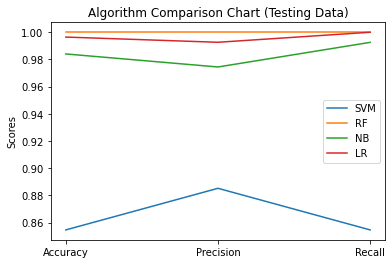

In [65]:
# Create data for line plot
data = {'SVM': [svc_accuracy_test, svc_precision_test, svc_recall_test],
        'RF': [rf_accuracy_test, rf_precision_test, rf_recall_test],
        'NB': [gnb_accuracy_test, gnb_precision_test, gnb_recall_test],
        'LR': [lr_accuracy_test, lr_precision_test, lr_recall_test]}
labels = ['Accuracy', 'Precision', 'Recall']

# Create line plot
fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

for alg, scores in data.items():
    ax.plot(x_pos, scores, label=alg)

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_ylabel('Scores')
ax.legend()

plt.title('Algorithm Comparison Chart (Testing Data)')
plt.show()


# Train vs Test

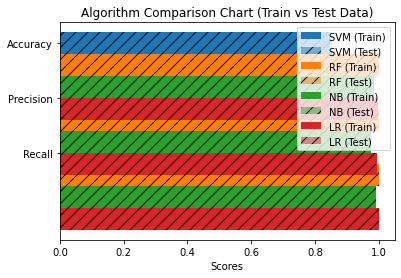

In [66]:
# Create data for stacked horizontal barplot
train_data = {'SVM': [svc_accuracy_train, svc_precision_train, svc_recall_train],
              'RF': [rf_accuracy_train, rf_precision_train, rf_recall_train],
              'NB': [gnb_accuracy_train, gnb_precision_train, gnb_recall_train],
              'LR': [lr_accuracy_train, lr_precision_train, lr_recall_train]}
test_data = {'SVM': [svc_accuracy_test, svc_precision_test, svc_recall_test],
             'RF': [rf_accuracy_test, rf_precision_test, rf_recall_test],
             'NB': [gnb_accuracy_test, gnb_precision_test, gnb_recall_test],
             'LR': [lr_accuracy_test, lr_precision_test, lr_recall_test]}
labels = ['Accuracy', 'Precision', 'Recall']

# Create stacked horizontal barplot
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
width = 0.4

for i, (alg, train_scores) in enumerate(train_data.items()):
    test_scores = test_data[alg]
    ax.barh(y_pos + (i * width), train_scores, width, label=alg+' (Train)', color='C'+str(i))
    ax.barh(y_pos + (i * width), test_scores, width, label=alg+' (Test)', color='C'+str(i), alpha=0.5, hatch='//')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Scores')
ax.legend()

plt.title('Algorithm Comparison Chart (Train vs Test Data)')
plt.show()


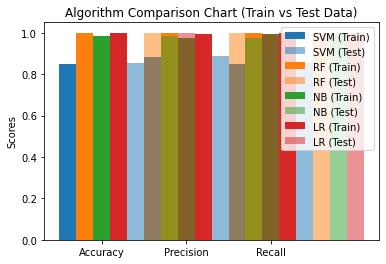

In [67]:
# Create data for grouped barplot
train_data = {'SVM': [svc_accuracy_train, svc_precision_train, svc_recall_train],
              'RF': [rf_accuracy_train, rf_precision_train, rf_recall_train],
              'NB': [gnb_accuracy_train, gnb_precision_train, gnb_recall_train],
              'LR': [lr_accuracy_train, lr_precision_train, lr_recall_train]}
test_data = {'SVM': [svc_accuracy_test, svc_precision_test, svc_recall_test],
             'RF': [rf_accuracy_test, rf_precision_test, rf_recall_test],
             'NB': [gnb_accuracy_test, gnb_precision_test, gnb_recall_test],
             'LR': [lr_accuracy_test, lr_precision_test, lr_recall_test]}
labels = ['Accuracy', 'Precision', 'Recall']

# Create grouped barplot
fig, ax = plt.subplots()
x_pos = np.arange(len(labels))
width = 0.2

for i, (alg, train_scores) in enumerate(train_data.items()):
    test_scores = test_data[alg]
    ax.bar(x_pos + (i * width), train_scores, width, label=alg+' (Train)', color='C'+str(i))
    ax.bar(x_pos + (i * width) + (4 * width), test_scores, width, label=alg+' (Test)', color='C'+str(i), alpha=0.5)

ax.set_xticks(x_pos + (2 * width))
ax.set_xticklabels(labels)
ax.set_ylabel('Scores')
ax.legend()

plt.title('Algorithm Comparison Chart (Train vs Test Data)')
plt.show()


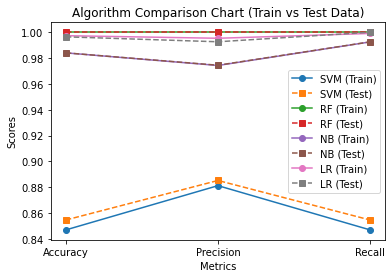

In [68]:
# Algorithm comparison line plot (Train vs Test)
train_data = {'SVM': [svc_accuracy_train, svc_precision_train, svc_recall_train],
              'RF': [rf_accuracy_train, rf_precision_train, rf_recall_train],
              'NB': [gnb_accuracy_train, gnb_precision_train, gnb_recall_train],
              'LR': [lr_accuracy_train, lr_precision_train, lr_recall_train]}
test_data = {'SVM': [svc_accuracy_test, svc_precision_test, svc_recall_test],
             'RF': [rf_accuracy_test, rf_precision_test, rf_recall_test],
             'NB': [gnb_accuracy_test, gnb_precision_test, gnb_recall_test],
             'LR': [lr_accuracy_test, lr_precision_test, lr_recall_test]}
labels = ['Accuracy', 'Precision', 'Recall']

# Create line plot
fig, ax = plt.subplots()
x_pos = np.arange(len(labels))

for alg in train_data.keys():
    train_scores = train_data[alg]
    test_scores = test_data[alg]
    ax.plot(x_pos, train_scores, label=alg+' (Train)', marker='o')
    ax.plot(x_pos, test_scores, label=alg+' (Test)', linestyle='--', marker='s')

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.legend()

plt.title('Algorithm Comparison Chart (Train vs Test Data)')
plt.show()


# predictive System for All Algorithms

In [69]:

# Define a function to make predictions using all four classifiers
def predict_class(data):
    # Use each classifier to make a prediction on the new data point
    rf_prediction = rfc.predict(data)[0]
    svm_prediction = classifier.predict(data)[0]
    nb_prediction = gnb.predict(data)[0]
    lr_prediction = lr.predict(data)[0]

    # Combine the predictions from each classifier using majority voting
    if (rf_prediction + svm_prediction + nb_prediction + lr_prediction) >= 2:
        return 1
    else:
        return 0

# Take input from the user for prediction
statuses_count = int(input("Enter the statuses count: "))
followers_count = int(input("Enter the followers count: "))
friends_count = int(input("Enter the friends count: "))
favourites_count = int(input("Enter the favourites count: "))
listed_count = int(input("Enter the listed count: "))
geo_enabled = bool(input("Enter whether geo enabled or not (True/False): "))
profile_use_background_image = bool(input("Enter whether profile use background image or not (True/False): "))
lang_num = int(input("Enter the language: "))
# Create a new data point for prediction
new_data = np.array([[statuses_count, followers_count, friends_count, favourites_count, listed_count, lang_num, geo_enabled, profile_use_background_image]])

# Use the predict_class function to make predictions on the new data point
prediction = predict_class(new_data)

# Print the predicted class of the new data point
if (prediction== 0):
  print('Profile is not Fake')
else:
  print('Profile is Fake')


Enter the statuses count: 42
Enter the followers count: 19
Enter the friends count: 368
Enter the favourites count: 0
Enter the listed count: 0
Enter whether geo enabled or not (True/False): Fale
Enter whether profile use background image or not (True/False): True
Enter the language: 1
Profile is Fake


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [70]:
import jovian

In [71]:
project_name='final-project'

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>